In [72]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import wrangle

from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

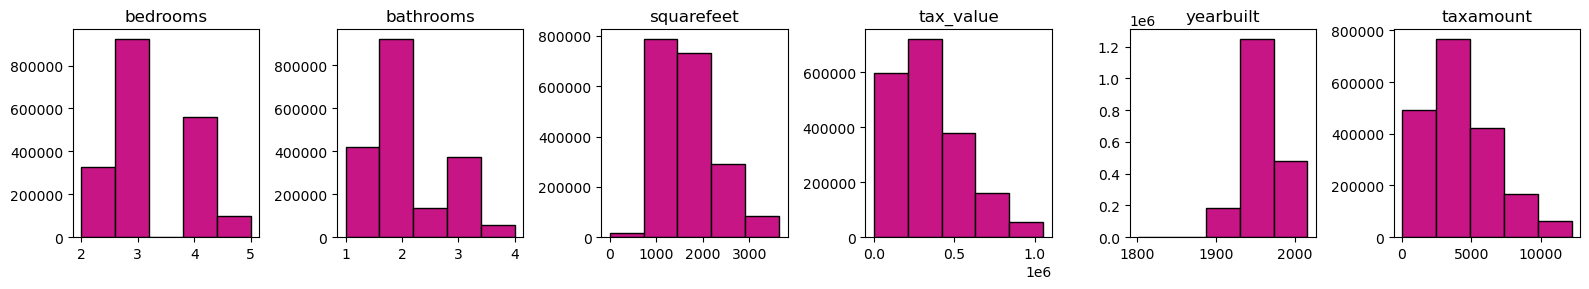

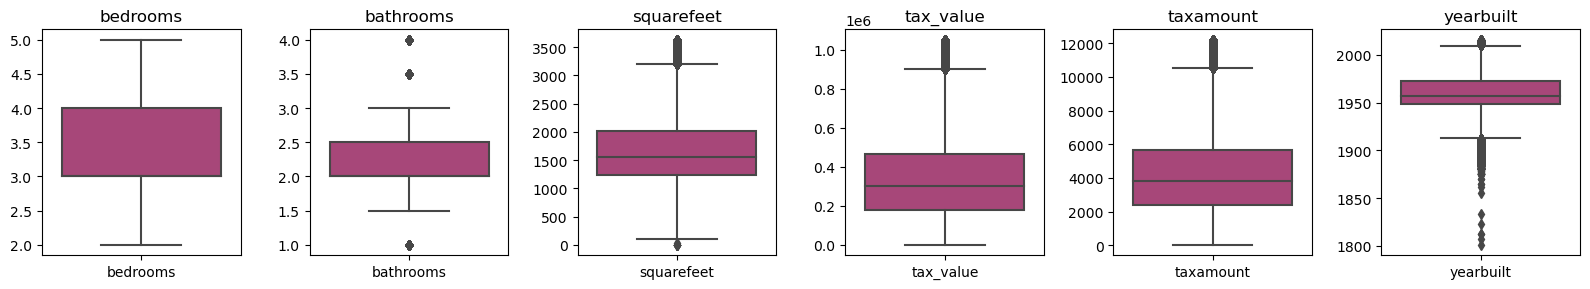

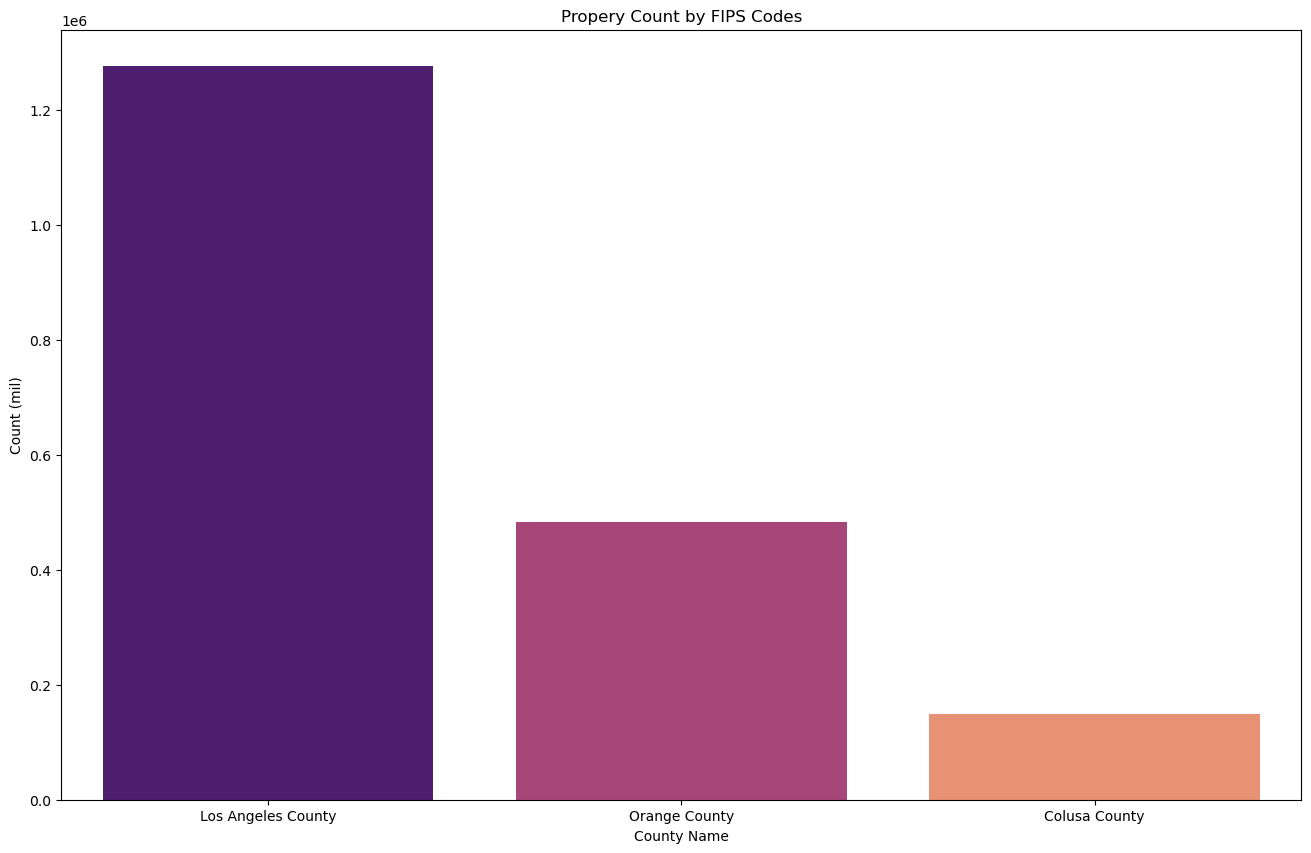

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train.head()

,bedrooms,bathrooms,squarefeet,tax_value,yearbuilt,taxamount,fips,propertytypeid,fips_location
1162651,3.0,2.0,1537.0,202000.0,2008.0,3410.01,6037,261,Los Angeles County
782265,3.0,3.0,1780.0,533026.0,1958.0,6415.11,6037,261,Los Angeles County
405503,4.0,2.0,1839.0,358975.0,1981.0,4575.06,6037,261,Los Angeles County
1028626,4.0,2.0,1756.0,543158.0,1950.0,6721.89,6037,261,Los Angeles County
1802146,3.0,2.0,1212.0,331065.0,1958.0,3610.64,6037,261,Los Angeles County


In [4]:
train.bedrooms.value_counts()

3.0    515483
4.0    315383
2.0    182671
5.0     54731
Name: bedrooms, dtype: int64

In [5]:
train.bathrooms.value_counts()

2.00    515273
1.00    218013
3.00    209527
2.50     76509
4.00     23009
1.50     17155
3.50      8780
1.75         2
Name: bathrooms, dtype: int64

In [43]:
x_train = train.drop(columns=(['tax_value', 'fips_location', 'fips', 'propertytypeid']))
x_val = validate.drop(columns=(['tax_value', 'fips_location', 'fips', 'propertytypeid']))
x_test = test.drop(columns=(['tax_value', 'fips_location', 'fips', 'propertytypeid']))
x_train

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount
1162651,3.0,2.0,1537.0,2008.0,3410.01
782265,3.0,3.0,1780.0,1958.0,6415.11
405503,4.0,2.0,1839.0,1981.0,4575.06
1028626,4.0,2.0,1756.0,1950.0,6721.89
1802146,3.0,2.0,1212.0,1958.0,3610.64
...,...,...,...,...,...
121192,4.0,2.0,1325.0,1948.0,3689.27
1625371,4.0,2.5,2419.0,2000.0,10197.90
952015,3.0,2.0,1682.0,1965.0,8946.87
1726184,4.0,3.0,1140.0,1957.0,3091.76


## Scaling taxamount

#### Robust Scaler

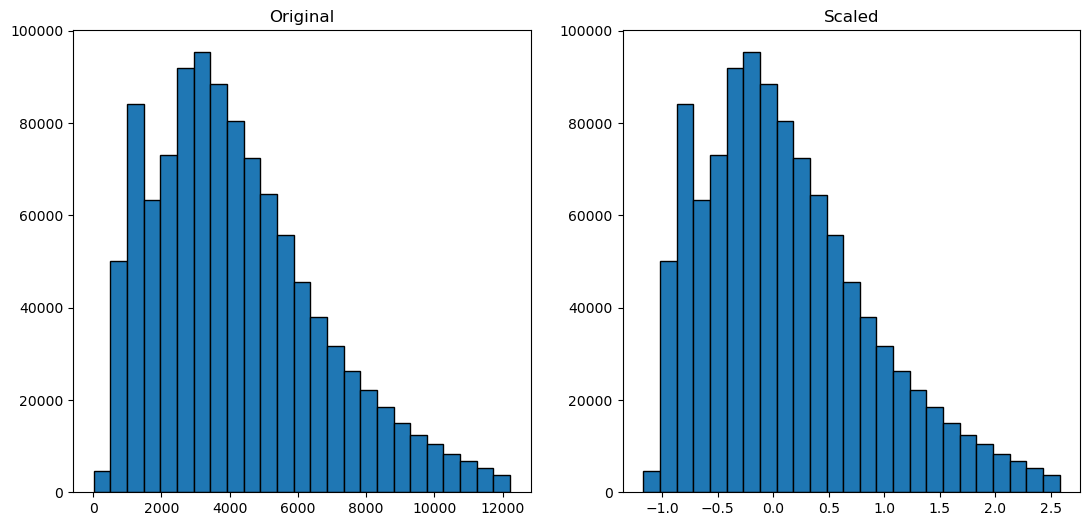

In [7]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(x_train[['taxamount']])

x_train_taxamount_scaled = scaler.transform(x_train[['taxamount']])
x_val_taxamount_scaled = scaler.transform(x_val[['taxamount']])
x_test_taxamount_scaled = scaler.transform(x_test[['taxamount']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_taxamount_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

#### MinMax Scaler

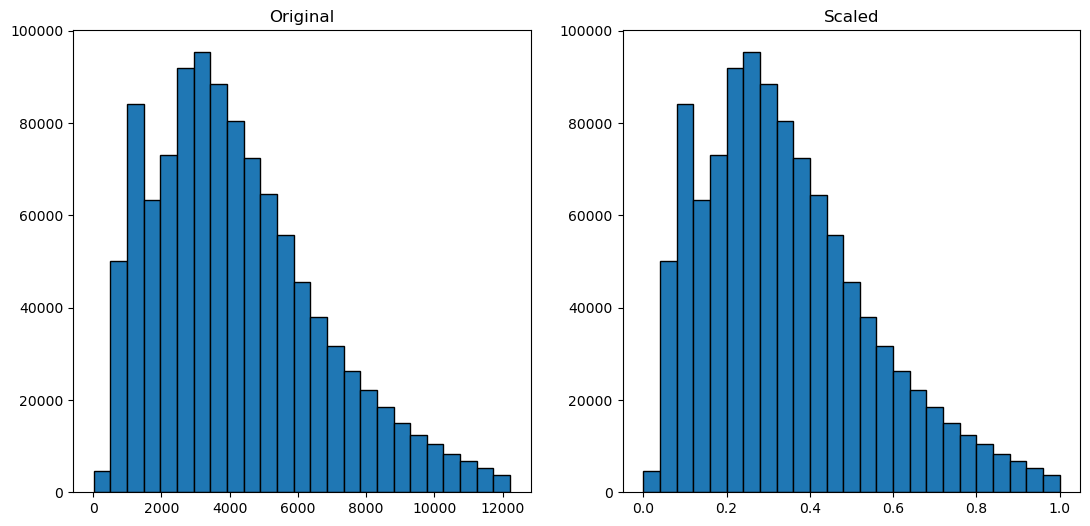

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(x_train[['taxamount']])

x_train_taxamount_scaled = scaler.transform(x_train[['taxamount']])
x_val_taxamount_scaled = scaler.transform(x_val[['taxamount']])
x_test_taxamount_scaled = scaler.transform(x_test[['taxamount']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_taxamount_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

#### Standard Scaler

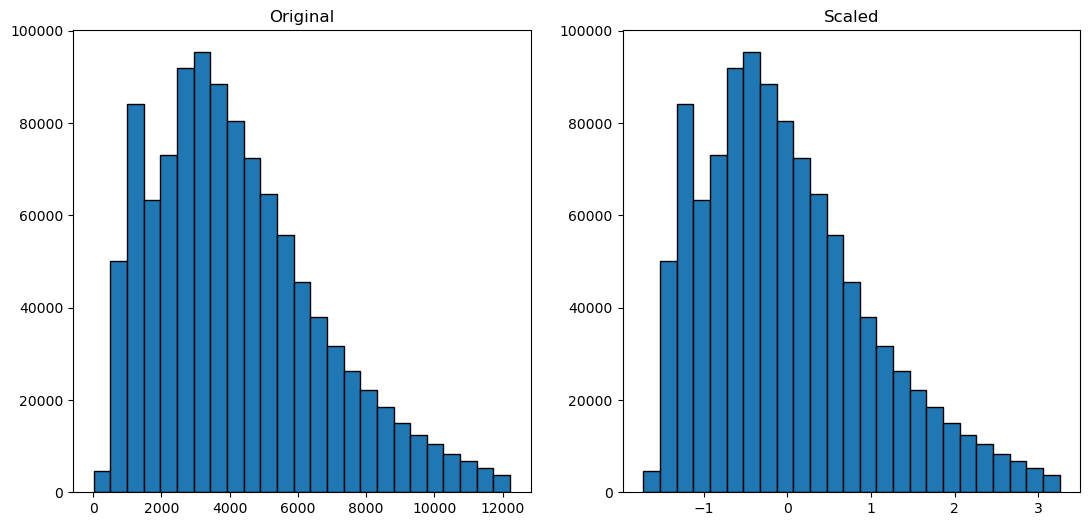

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train[['taxamount']])

x_train_taxamount_scaled = scaler.transform(x_train[['taxamount']])
x_val_taxamount_scaled = scaler.transform(x_val[['taxamount']])
x_test_taxamount_scaled = scaler.transform(x_test[['taxamount']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_taxamount_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

#### Quantile Transformer

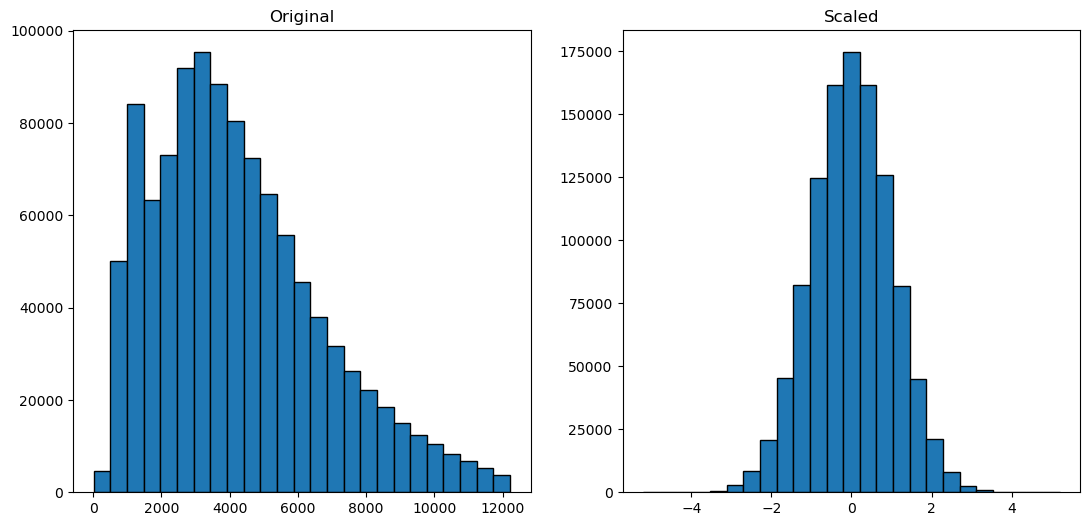

In [10]:
from sklearn.preprocessing import QuantileTransformer

scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler.fit(x_train[['taxamount']])

x_train_taxamount_scaled = scaler.transform(x_train[['taxamount']])
x_val_taxamount_scaled = scaler.transform(x_val[['taxamount']])
x_test_taxamount_scaled = scaler.transform(x_test[['taxamount']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_taxamount_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

## Scaling squarefeet

#### Robust Scaler

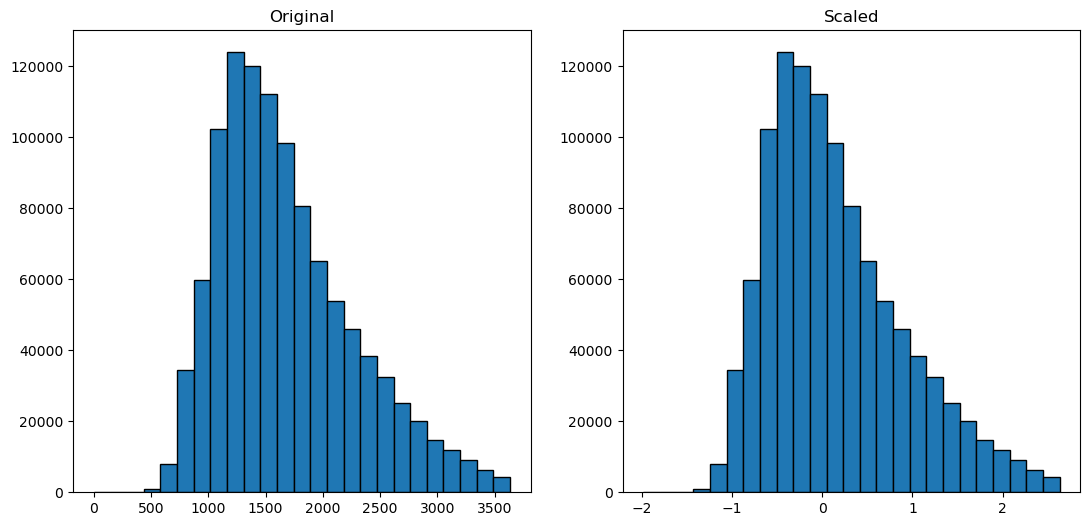

In [12]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(x_train[['squarefeet']])

x_train_squarefeet_scaled = scaler.transform(x_train[['squarefeet']])
x_val_squarefeet_scaled = scaler.transform(x_val[['squarefeet']])
x_test_squarefeet_scaled = scaler.transform(x_test[['squarefeet']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.squarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_squarefeet_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

#### MinMax Scaler

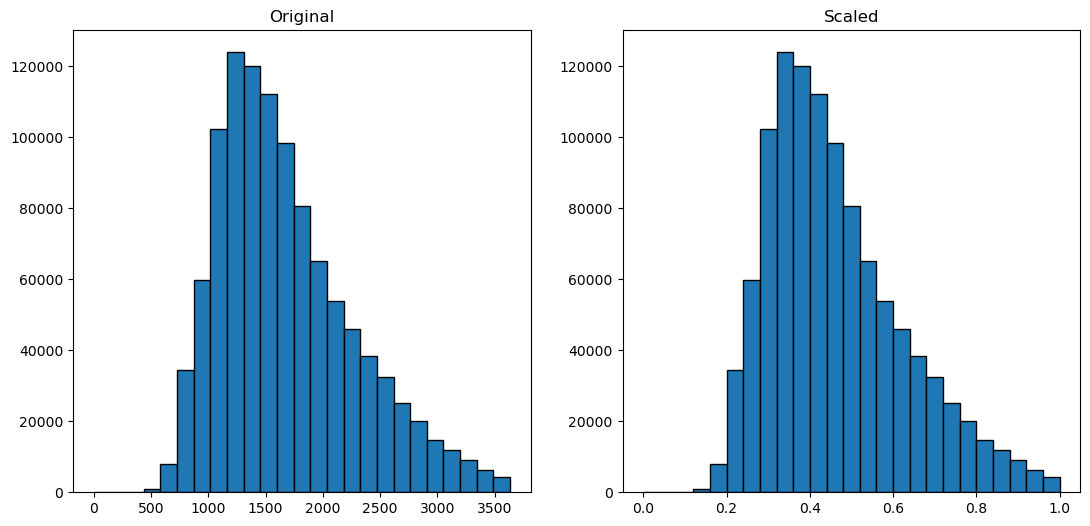

In [13]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(x_train[['squarefeet']])

x_train_squarefeet_scaled = scaler.transform(x_train[['squarefeet']])
x_val_squarefeet_scaled = scaler.transform(x_val[['squarefeet']])
x_test_squarefeet_scaled = scaler.transform(x_test[['squarefeet']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.squarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_squarefeet_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

#### Standard Scaler

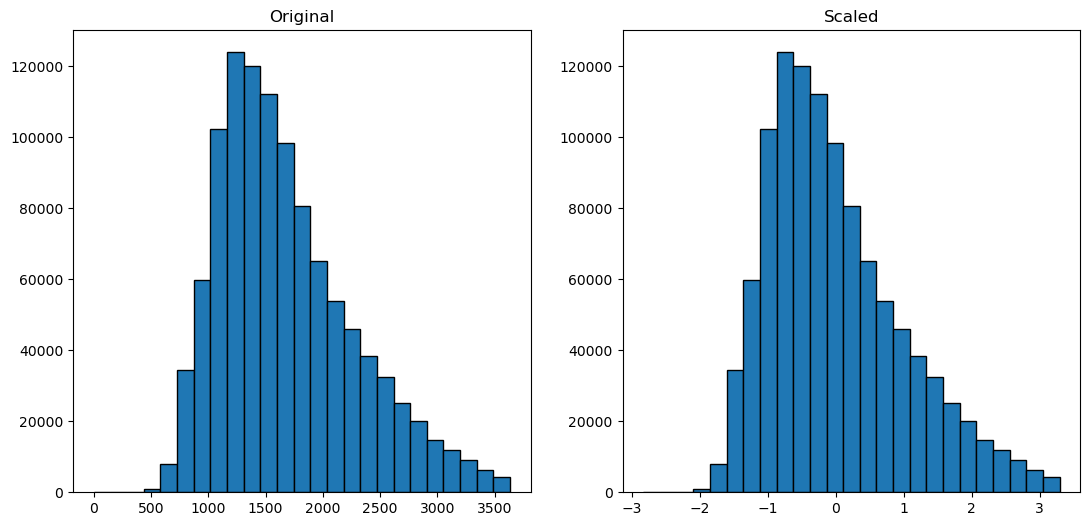

In [14]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train[['squarefeet']])

x_train_squarefeet_scaled = scaler.transform(x_train[['squarefeet']])
x_val_squarefeet_scaled = scaler.transform(x_val[['squarefeet']])
x_test_squarefeet_scaled = scaler.transform(x_test[['squarefeet']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.squarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_squarefeet_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

#### Quantile Transformer

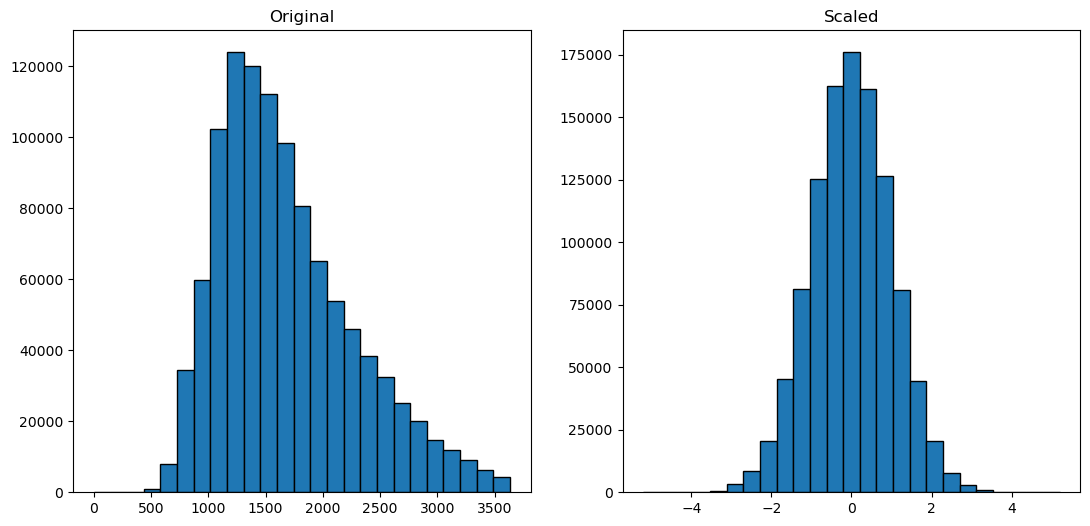

In [15]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler.fit(x_train[['squarefeet']])

x_train_squarefeet_scaled = scaler.transform(x_train[['squarefeet']])
x_val_squarefeet_scaled = scaler.transform(x_val[['squarefeet']])
x_test_squarefeet_scaled = scaler.transform(x_test[['squarefeet']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.squarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_squarefeet_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

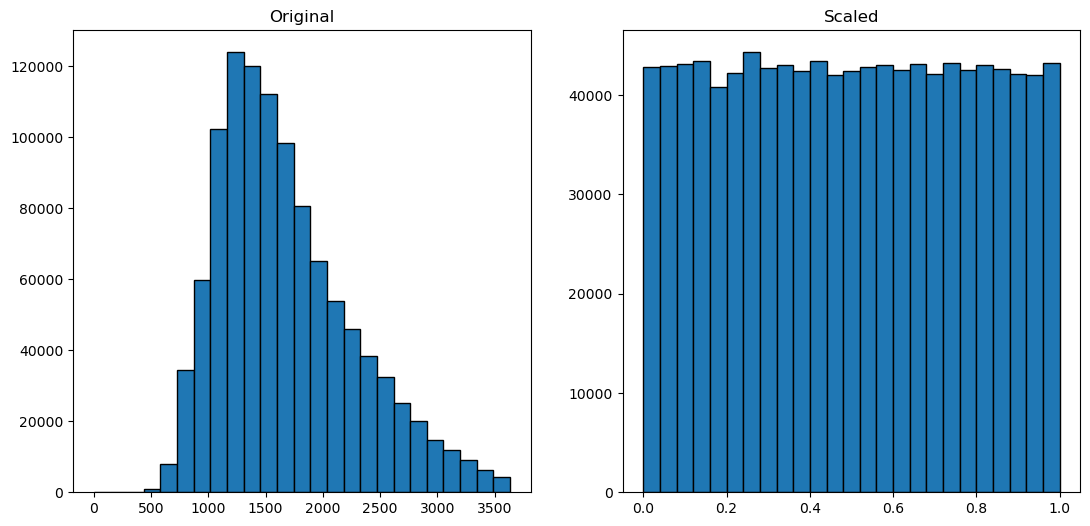

In [16]:
scaler = sklearn.preprocessing.QuantileTransformer()
scaler.fit(x_train[['squarefeet']])

x_train_squarefeet_scaled = scaler.transform(x_train[['squarefeet']])
x_val_squarefeet_scaled = scaler.transform(x_val[['squarefeet']])
x_test_squarefeet_scaled = scaler.transform(x_test[['squarefeet']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.squarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_squarefeet_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [17]:
og_data = scaler.inverse_transform(x_train_squarefeet_scaled)

Text(0.5, 1.0, 'Original')

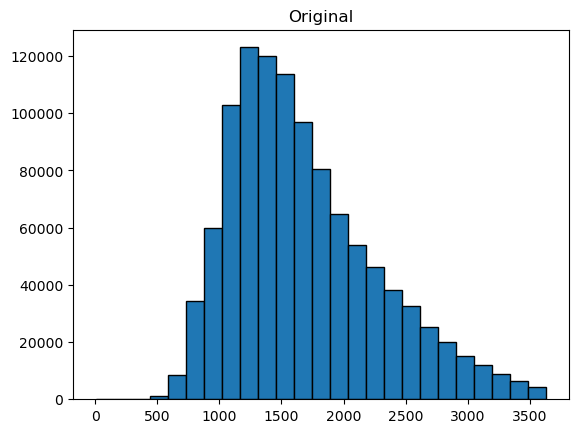

In [18]:
plt.hist(og_data, bins=25, ec='black')
plt.title('Original')

In [19]:
og_data

array([[1537.],
       [1780.],
       [1839.],
       ...,
       [1682.],
       [1140.],
       [1868.]])

In [20]:
x_train['squarefeet']

# Yes it does appear to be the same as the original data when inversely transformed

1162651    1537.0
782265     1780.0
405503     1839.0
1028626    1756.0
1802146    1212.0
            ...  
121192     1325.0
1625371    2419.0
952015     1682.0
1726184    1140.0
505987     1868.0
Name: squarefeet, Length: 1068268, dtype: float64

### Function Time!

In [ ]:
x_train_scaled_dict = []

def standard_scaler(df):
    
    cols = df.columns
    print(cols)
    for col in cols:
        x_train[col] = x_train[col].astype(int)
        x_train_scaled_dict.append(x_train[col])
 
        scaler = sklearn.preprocessing.StandardScaler()
        scaler.fit(x_train[[col]])

        x_train_scaled[col] = scaler.transform(x_train[[col]])
        #x_val_taxamount_scaled = scaler.transform(x_val[['taxamount']])
        #x_test_taxamount_scaled = scaler.transform(x_test[['taxamount']])

        x_train_scaled_dict.append(x_train_scaled[col])

        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(x_train[col], bins=25, ec='black')
        plt.title(f'Original {col}')
        plt.subplot(122)
        plt.hist(x_train_scaled[col], bins=25, ec='black')
        plt.title(f'Scaled {col}')
        plt.show()

In [46]:
columns = x_train.columns.to_list()
columns

['bedrooms', 'bathrooms', 'squarefeet', 'yearbuilt', 'taxamount']

In [47]:
x_train

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount
1162651,3.0,2.0,1537.0,2008.0,3410.01
782265,3.0,3.0,1780.0,1958.0,6415.11
405503,4.0,2.0,1839.0,1981.0,4575.06
1028626,4.0,2.0,1756.0,1950.0,6721.89
1802146,3.0,2.0,1212.0,1958.0,3610.64
...,...,...,...,...,...
121192,4.0,2.0,1325.0,1948.0,3689.27
1625371,4.0,2.5,2419.0,2000.0,10197.90
952015,3.0,2.0,1682.0,1965.0,8946.87
1726184,4.0,3.0,1140.0,1957.0,3091.76


In [42]:
train.head()

,bedrooms,bathrooms,squarefeet,tax_value,yearbuilt,taxamount,fips,propertytypeid,fips_location
1162651,3.0,2.0,1537.0,202000.0,2008.0,3410.01,6037,261,Los Angeles County
782265,3.0,3.0,1780.0,533026.0,1958.0,6415.11,6037,261,Los Angeles County
405503,4.0,2.0,1839.0,358975.0,1981.0,4575.06,6037,261,Los Angeles County
1028626,4.0,2.0,1756.0,543158.0,1950.0,6721.89,6037,261,Los Angeles County
1802146,3.0,2.0,1212.0,331065.0,1958.0,3610.64,6037,261,Los Angeles County


In [48]:
X = train.drop(columns='tax_value')
y = train[['tax_value']]

In [58]:
X_scaled = X.copy()
X_scaled[columns]

,bedrooms,bathrooms,squarefeet,yearbuilt,taxamount
1162651,3.0,2.0,1537.0,2008.0,3410.01
782265,3.0,3.0,1780.0,1958.0,6415.11
405503,4.0,2.0,1839.0,1981.0,4575.06
1028626,4.0,2.0,1756.0,1950.0,6721.89
1802146,3.0,2.0,1212.0,1958.0,3610.64
...,...,...,...,...,...
121192,4.0,2.0,1325.0,1948.0,3689.27
1625371,4.0,2.5,2419.0,2000.0,10197.90
952015,3.0,2.0,1682.0,1965.0,8946.87
1726184,4.0,3.0,1140.0,1957.0,3091.76


In [78]:
# fig and axes can be referenced to as the object


def scale_and_vis(scaler, X, columns):
    X_scaled = X.copy()
    X_scaled[columns] = scaler.fit_transform(X_scaled[columns])

    fig, axs = plt.subplots(len(columns), 2, figsize=(16, 11))
    for (ax1, ax2), col in zip(axs, columns):

        ax1.hist(X[col])
        ax1.set(title=f'Distribution of Unscaled {col}', xlabel=f'Value of {col}', ylabel=f'Count of {col}')

        ax2.hist(X_scaled[col])
        ax2.set(title=f'Distribution of Scaled {col}', xlabel=f'Value of {col}', ylabel=f'Count of {col}')
    
    fig.suptitle(f'Scaling Visualization for {scaler}', fontsize=16)
    
    plt.tight_layout()
    plt.show()

#     print(ax)
#     print(ax[0])
#     print(ax[1])
    
    
    

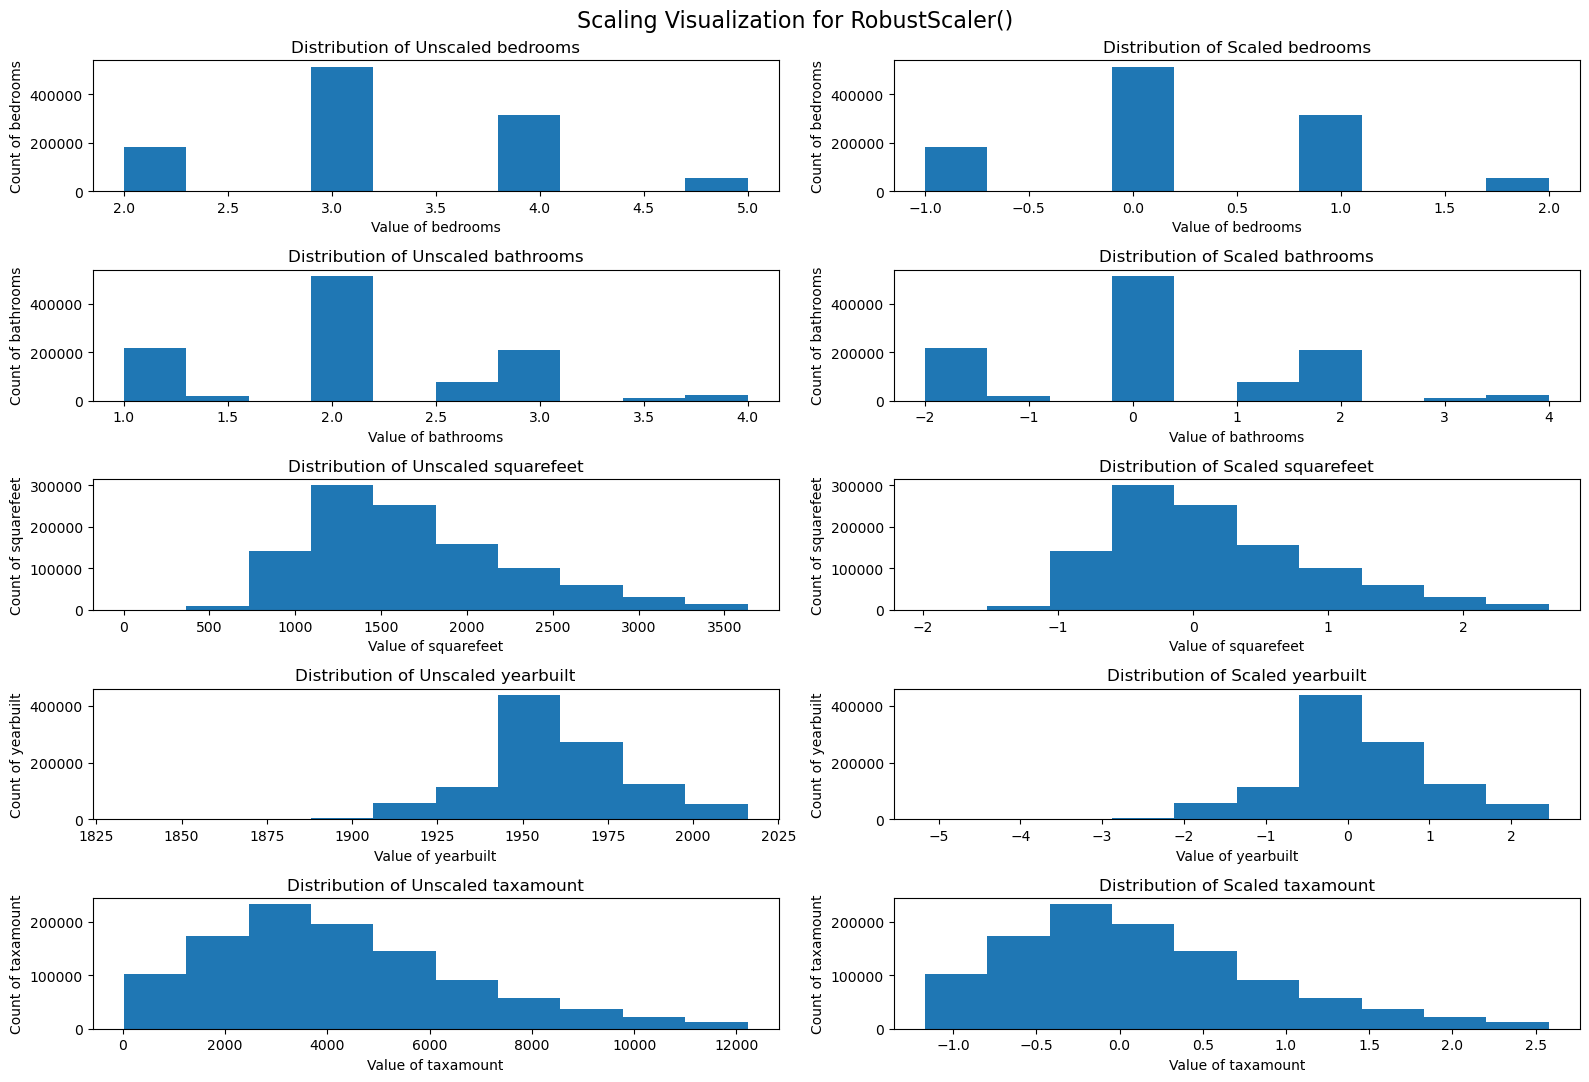

In [79]:
scale_and_vis(RobustScaler(), X, columns)

In [87]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'squarefeet', 'yearbuilt', 'taxamount'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values, 
                                                  index = train.index)
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [90]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

,bedrooms,bathrooms,squarefeet,tax_value,yearbuilt,taxamount,fips,propertytypeid,fips_location
1162651,0.333333,0.333333,0.422675,202000.0,0.956284,0.278072,6037,261,Los Angeles County
782265,0.333333,0.666667,0.489543,533026.0,0.683060,0.524315,6037,261,Los Angeles County
405503,0.666667,0.333333,0.505779,358975.0,0.808743,0.373538,6037,261,Los Angeles County
1028626,0.666667,0.333333,0.482939,543158.0,0.639344,0.549453,6037,261,Los Angeles County
1802146,0.333333,0.333333,0.333242,331065.0,0.683060,0.294512,6037,261,Los Angeles County
...,...,...,...,...,...,...,...,...,...
121192,0.666667,0.333333,0.364337,258644.0,0.628415,0.300955,6037,261,Los Angeles County
1625371,0.666667,0.500000,0.665382,735228.0,0.912568,0.834283,6059,261,Orange County
952015,0.333333,0.333333,0.462576,768733.0,0.721311,0.731771,6037,261,Los Angeles County
1726184,0.666667,0.666667,0.313429,247432.0,0.677596,0.251994,6037,261,Los Angeles County


Index(['bedrooms', 'bathrooms', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips', 'propertytypeid', 'fips_location'],
      dtype='object')